In [585]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import plotly.express as px
import seaborn as sns
from datetime import datetime
from scipy import stats
from scipy.stats import f_oneway,chi2_contingency

In [586]:
import sqlite3
import pandas as pd
conn_temperature = sqlite3.connect("temperature.sqlite3")
query_temperature = "SELECT * FROM Temperature"
data_temperature = pd.read_sql_query(query_temperature, conn_temperature)
data_temperature

,record_id,date,nom,nom_epci,département,nom_reg,temperature_celsius
0,c158378e65f791204689224097e0a1d02b93a490,2016-01-31T21:00:00+00:00,PTE DE LA HAGUE,CA du Cotentin,MANCHE,Normandie,11.8
1,0fd3d26c5afea353ca343030076206595b9e8ebf,2016-01-31T21:00:00+00:00,ALENCON,CU d'Alençon,ORNE,Normandie,12.2
2,6914f18b20d61485a68f2545298e1c8eaba4dc8e,2016-01-31T21:00:00+00:00,PTE DE CHASSIRON,CC de l'Ile d'Oléron,CHARENTE-MARITIME,Nouvelle-Aquitaine,12.2
3,fd21b8712be60fd0f32211b038b986cc5acce455,2016-01-31T21:00:00+00:00,DUMONT D'URVILLE,None,CHARENTE-MARITIME,None,-7.79999999999995
4,64c62a875d85168ce95b16291be518b5c5f85958,2016-01-31T21:00:00+00:00,MONT-DE-MARSAN,CA Mont de Marsan Agglomération,LANDES,Nouvelle-Aquitaine,12.8
...,...,...,...,...,...,...,...
719995,5a69f8ffb0cf1cdd6d0758fb70ae94a2e6f0a491,2021-12-10T03:00:00+00:00,ST-PIERRE,None,SAINT-PIERRE-ET-MIQUELON,Saint-Pierre-et-Miquelon,-2.39999999999998
719996,d24e0839ce0baf93bad8bd44088ffcb2ff0e1abb,2021-12-10T03:00:00+00:00,STRASBOURG-ENTZHEIM,Eurométropole de Strasbourg,BAS-RHIN,Grand Est,-0.0999999999999659
719997,e96bcd96eda81f969c56843879699a6720bdeea4,2021-12-10T03:00:00+00:00,BALE-MULHOUSE,CA Saint-Louis Agglomération,HAUT-RHIN,Grand Est,-0.599999999999966
719998,78dced6ac7f5a5c6d6a9ff6770910c391c550eb4,2021-12-10T03:00:00+00:00,CAYENNE-MATOURY,CA du Centre Littoral,GUYANE,Guyane,24.4


In [587]:
conn_objet_trouve = sqlite3.connect("objet_trouve.sqlite3")
query_objet_trouve = "SELECT * FROM Objet_trouve"
data_objet_trouve = pd.read_sql_query(query_objet_trouve, conn_objet_trouve)
data_objet_trouve

,record_id,id_gare_origine,nom_gare_origine,type_objet_trouve,nature_objet_trouve,date
0,1,0087271007,Paris Gare du Nord,Pièces d'identités et papiers personnels,"Carte d'identité, passeport, permis de conduire",2016-01-31T21:49:49+00:00
1,2,0087271007,Paris Gare du Nord,"Appareils électroniques, informatiques, appare...",Téléphone portable,2016-01-31T21:30:04+00:00
2,3,0087773002,Montpellier Saint-Roch,"Bagagerie: sacs, valises, cartables","Sac d'enseigne (plastique, papier, …)",2016-01-31T21:29:14+00:00
3,4,0087773002,Montpellier Saint-Roch,Divers,Autres divers,2016-01-31T21:27:25+00:00
4,5,0087271007,Paris Gare du Nord,"Bagagerie: sacs, valises, cartables","Sacoche ventrale, banane",2016-01-31T21:23:22+00:00
...,...,...,...,...,...,...
481297,481298,0087683268,Laroche - Migennes,Articles médicaux,Radiographie,2021-12-01T07:24:00+00:00
481298,481299,0087212027,Strasbourg,"Bagagerie: sacs, valises, cartables","Sac de voyage, sac de sport, sac à bandoulière",2021-12-01T07:11:54+00:00
481299,481300,0087411017,Rouen Rive Droite,"Clés, porte-clés, badge magnétique","Clés, porte-clés",2021-12-01T05:44:51+00:00
481300,481301,0087723197,Lyon Part Dieu,"Appareils électroniques, informatiques, appare...","AirPod, casque audio, écouteurs",2021-12-01T05:25:12+00:00


In [588]:
#Voir calendar et group by pour créer par semaine
df_semaine =data_objet_trouve.groupby(by=["date"]).sum()
df_semaine

/tmp/ipykernel_13941/2029778075.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,record_id
date,
2016-01-01T05:29:11+00:00,7243
2016-01-01T05:37:52+00:00,7242
2016-01-01T06:19:40+00:00,7241
2016-01-01T06:31:15+00:00,7240
2016-01-01T06:44:54+00:00,7239
...,...
2021-12-31T21:39:32+00:00,475263
2021-12-31T22:19:47+00:00,475262
2021-12-31T22:23:27+00:00,475261


In [589]:
conn_villes_gares = sqlite3.connect("villes_gares.sqlite3")
query_villes_gares = "SELECT * FROM Ville_Gare"
data_villes_gares = pd.read_sql_query(query_villes_gares, conn_villes_gares)
data_villes_gares

,id,gare,ville,département
0,1,Bandol,BANDOL,VAR
1,2,Pouilly-sur-Loire,POUILLY-SUR-LOIRE,NIEVRE
2,3,Arbois,ARBOIS,JURA
3,4,Cases-de-Pène,ESPIRA-DE-L'AGLY,PYRENEES-ORIENTALES
4,5,Nantes,NANTES,LOIRE-ATLANTIQUE
...,...,...,...,...
3411,3412,Compans,COMPANS,SEINE-ET-MARNE
3412,3413,Charmes,CHARMES,VOSGES
3413,3414,Ham-en-Artois,HAM-EN-ARTOIS,PAS-DE-CALAIS
3414,3415,Goxwiller,GOXWILLER,BAS-RHIN


In [590]:
list_departement = []
list_departement = data_villes_gares["département"].unique()
list(list_departement)

['VAR',
 'NIEVRE',
 'JURA',
 'PYRENEES-ORIENTALES',
 'LOIRE-ATLANTIQUE',
 'HAUTE-MARNE',
 'BOUCHES-DU-RHONE',
 'ALLIER',
 'SARTHE',
 'OISE',
 'SOMME',
 'HAUTE-GARONNE',
 'ESSONNE',
 'MEURTHE-ET-MOSELLE',
 'AIN',
 'VAL-DE-MARNE',
 'MOSELLE',
 'NORD',
 'VOSGES',
 'PAS-DE-CALAIS',
 'CHARENTE-MARITIME',
 'GIRONDE',
 'SEINE-SAINT-DENIS',
 'VAUCLUSE',
 'SAONE-ET-LOIRE',
 'ARDENNES',
 'SEINE-MARITIME',
 'PUY-DE-DOME',
 'MANCHE',
 'YONNE',
 'MARNE',
 'SAVOIE',
 'ISERE',
 'SEINE-ET-MARNE',
 'CHER',
 'CHARENTE',
 'CANTAL',
 'EURE-ET-LOIR',
 'GERS',
 "COTE-D'OR",
 'HAUTS-DE-SEINE',
 'INDRE-ET-LOIRE',
 'LOIR-ET-CHER',
 'LOIRET',
 'DOUBS',
 'YVELINES',
 'HAUTE-VIENNE',
 'VIENNE',
 'RHONE',
 'MORBIHAN',
 "COTES-D'ARMOR",
 'TARN',
 'HAUT-RHIN',
 'ORNE',
 'TERRITOIRE-DE-BELFORT',
 'HERAULT',
 'LOT',
 'DEUX-SEVRES',
 'ILLE-ET-VILAINE',
 'EURE',
 'BAS-RHIN',
 'LOT-ET-GARONNE',
 'TARN-ET-GARONNE',
 'ALPES-MARITIMES',
 'AVEYRON',
 'AISNE',
 'DROME',
 'LANDES',
 'HAUTE-SAVOIE',
 'DORDOGNE',
 'LOZERE',
 'HA

In [591]:
list_departement = list(list_departement)

Question n°1

In [592]:
data_objet_trouve_modifie = data_objet_trouve
#df['A'] = df['A'].apply(lambda x: 0 if x < 2 else x)
data_objet_trouve_modifie["date"]= data_objet_trouve_modifie["date"].apply(lambda x : x[0:10] )
data_objet_trouve_modifie

,record_id,id_gare_origine,nom_gare_origine,type_objet_trouve,nature_objet_trouve,date
0,1,0087271007,Paris Gare du Nord,Pièces d'identités et papiers personnels,"Carte d'identité, passeport, permis de conduire",2016-01-31
1,2,0087271007,Paris Gare du Nord,"Appareils électroniques, informatiques, appare...",Téléphone portable,2016-01-31
2,3,0087773002,Montpellier Saint-Roch,"Bagagerie: sacs, valises, cartables","Sac d'enseigne (plastique, papier, …)",2016-01-31
3,4,0087773002,Montpellier Saint-Roch,Divers,Autres divers,2016-01-31
4,5,0087271007,Paris Gare du Nord,"Bagagerie: sacs, valises, cartables","Sacoche ventrale, banane",2016-01-31
...,...,...,...,...,...,...
481297,481298,0087683268,Laroche - Migennes,Articles médicaux,Radiographie,2021-12-01
481298,481299,0087212027,Strasbourg,"Bagagerie: sacs, valises, cartables","Sac de voyage, sac de sport, sac à bandoulière",2021-12-01
481299,481300,0087411017,Rouen Rive Droite,"Clés, porte-clés, badge magnétique","Clés, porte-clés",2021-12-01
481300,481301,0087723197,Lyon Part Dieu,"Appareils électroniques, informatiques, appare...","AirPod, casque audio, écouteurs",2021-12-01


In [593]:
df_nombre_objet_trouve =data_objet_trouve_modifie
df_nombre_objet_trouve['date']= pd.to_datetime(df_nombre_objet_trouve['date'])
df_nombre_objet_trouve

,record_id,id_gare_origine,nom_gare_origine,type_objet_trouve,nature_objet_trouve,date
0,1,0087271007,Paris Gare du Nord,Pièces d'identités et papiers personnels,"Carte d'identité, passeport, permis de conduire",2016-01-31
1,2,0087271007,Paris Gare du Nord,"Appareils électroniques, informatiques, appare...",Téléphone portable,2016-01-31
2,3,0087773002,Montpellier Saint-Roch,"Bagagerie: sacs, valises, cartables","Sac d'enseigne (plastique, papier, …)",2016-01-31
3,4,0087773002,Montpellier Saint-Roch,Divers,Autres divers,2016-01-31
4,5,0087271007,Paris Gare du Nord,"Bagagerie: sacs, valises, cartables","Sacoche ventrale, banane",2016-01-31
...,...,...,...,...,...,...
481297,481298,0087683268,Laroche - Migennes,Articles médicaux,Radiographie,2021-12-01
481298,481299,0087212027,Strasbourg,"Bagagerie: sacs, valises, cartables","Sac de voyage, sac de sport, sac à bandoulière",2021-12-01
481299,481300,0087411017,Rouen Rive Droite,"Clés, porte-clés, badge magnétique","Clés, porte-clés",2021-12-01
481300,481301,0087723197,Lyon Part Dieu,"Appareils électroniques, informatiques, appare...","AirPod, casque audio, écouteurs",2021-12-01


In [594]:
df_nombre_objet_trouve_semaine=df_nombre_objet_trouve.groupby(by="date").apply(lambda s: pd.Series({ 
    "nombre_d'objet trouvé": s["date"].count(), 

}))


In [595]:
df_nombre_objet_trouve.dtypes

record_id                       int64
id_gare_origine                object
nom_gare_origine               object
type_objet_trouve              object
nature_objet_trouve            object
date                   datetime64[ns]
dtype: object

In [596]:
df_nombre_objet_trouve_semaine

,nombre_d'objet trouvé
date,
2016-01-01,83
2016-01-02,114
2016-01-03,134
2016-01-04,423
2016-01-05,250
...,...
2021-12-27,251
2021-12-28,211
2021-12-29,179


In [597]:
df_nombre_objet_trouve_semaine.reset_index(inplace=True)

In [598]:
df_nombre_objet_trouve_semaine


,date,nombre_d'objet trouvé
0,2016-01-01,83
1,2016-01-02,114
2,2016-01-03,134
3,2016-01-04,423
4,2016-01-05,250
...,...,...
2168,2021-12-27,251
2169,2021-12-28,211
2170,2021-12-29,179
2171,2021-12-30,218


In [599]:
df_semaine=df_nombre_objet_trouve_semaine.groupby(pd.Grouper(key='date', freq='W-MON'))["nombre_d'objet trouvé"].agg('sum')
df_semaine

date
2016-01-04     754
2016-01-11    1708
2016-01-18    1806
2016-01-25    1690
2016-02-01    1725
              ... 
2021-12-06    1291
2021-12-13    1418
2021-12-20    1437
2021-12-27    1300
2022-01-03     782
Freq: W-MON, Name: nombre_d'objet trouvé, Length: 314, dtype: int64

In [600]:
df_semaine = df_semaine.to_frame()
df_semaine

,nombre_d'objet trouvé
date,
2016-01-04,754
2016-01-11,1708
2016-01-18,1806
2016-01-25,1690
2016-02-01,1725
...,...
2021-12-06,1291
2021-12-13,1418
2021-12-20,1437


array([[<AxesSubplot: title={'center': "nombre_d'objet trouvé"}>]],
      dtype=object)

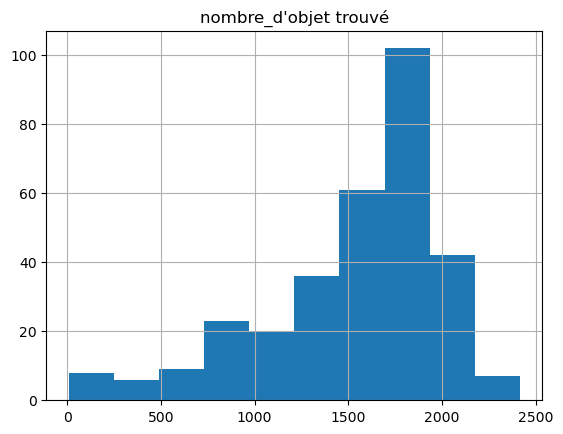

In [601]:
df_semaine.hist()

In [602]:
df_semaine.reset_index(inplace=True)

In [603]:
df_semaine["date"][313]

Timestamp('2022-01-03 00:00:00')

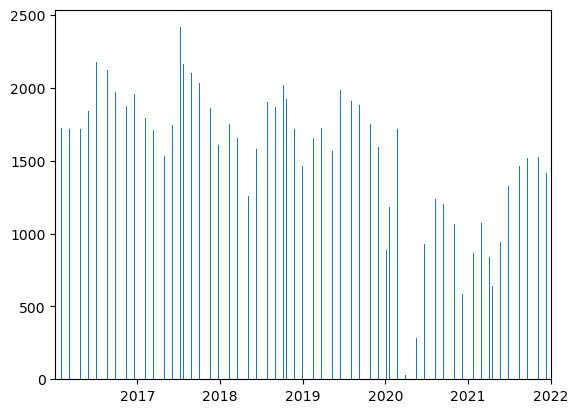

In [604]:
x=df_semaine["date"]
y=df_semaine["nombre_d\'objet trouvé"]
# Créez l'histogramme
plt.bar(x,y )

# Spécifiez les dates à afficher en Datetime
plt.xlim(df_semaine["date"][0], df_semaine["date"][313])

# # Ajoutez des étiquettes pour chaque barre
# plt.set_xticklabels(x)

# Affichez le graphique
plt.show()

Pour mieux presenter

plt.figure(figsize=(12,6))

quartier= list(df_air_bnb_anvers.neighbourhood_cleansed.unique())
x_pos = np.arange(len(quartier))

plt.bar(x_pos, counts)
plt.xticks(x_pos, quartier, rotation=90)


plt.show()

Question n°2

In [605]:
#la même question , mais il faut afficher seur le même graphique en fonction du type d'objet

In [606]:
df_nombre_objet_trouve

,record_id,id_gare_origine,nom_gare_origine,type_objet_trouve,nature_objet_trouve,date
0,1,0087271007,Paris Gare du Nord,Pièces d'identités et papiers personnels,"Carte d'identité, passeport, permis de conduire",2016-01-31
1,2,0087271007,Paris Gare du Nord,"Appareils électroniques, informatiques, appare...",Téléphone portable,2016-01-31
2,3,0087773002,Montpellier Saint-Roch,"Bagagerie: sacs, valises, cartables","Sac d'enseigne (plastique, papier, …)",2016-01-31
3,4,0087773002,Montpellier Saint-Roch,Divers,Autres divers,2016-01-31
4,5,0087271007,Paris Gare du Nord,"Bagagerie: sacs, valises, cartables","Sacoche ventrale, banane",2016-01-31
...,...,...,...,...,...,...
481297,481298,0087683268,Laroche - Migennes,Articles médicaux,Radiographie,2021-12-01
481298,481299,0087212027,Strasbourg,"Bagagerie: sacs, valises, cartables","Sac de voyage, sac de sport, sac à bandoulière",2021-12-01
481299,481300,0087411017,Rouen Rive Droite,"Clés, porte-clés, badge magnétique","Clés, porte-clés",2021-12-01
481300,481301,0087723197,Lyon Part Dieu,"Appareils électroniques, informatiques, appare...","AirPod, casque audio, écouteurs",2021-12-01


In [607]:
df_nombre_objet_trouve_evolution=df_nombre_objet_trouve.groupby(by=["date","type_objet_trouve"]).apply(lambda s: pd.Series({ 
    "nombre_d'objet trouvé": s["date"].count(), 

}))


In [608]:
df_nombre_objet_trouve_evolution.reset_index(inplace=True)
df_nombre_objet_trouve_evolution

,date,type_objet_trouve,nombre_d'objet trouvé
0,2016-01-01,"Appareils électroniques, informatiques, appare...",13
1,2016-01-01,"Articles de sport, loisirs, camping",1
2,2016-01-01,Articles médicaux,1
3,2016-01-01,"Bagagerie: sacs, valises, cartables",18
4,2016-01-01,"Clés, porte-clés, badge magnétique",4
...,...,...,...
30060,2021-12-31,Optique,5
30061,2021-12-31,Pièces d'identités et papiers personnels,7
30062,2021-12-31,"Porte-monnaie / portefeuille, argent, titres",15
30063,2021-12-31,"Vélos, trottinettes, accessoires 2 roues",6


In [609]:
df_list_objet = df_nombre_objet_trouve_evolution["type_objet_trouve"].unique()

In [610]:
list_objet_trouve = list(df_list_objet)

In [611]:
list_objet_trouve[0]

'Appareils électroniques, informatiques, appareils photo'

In [612]:
df_nombre_objet_trouve_evolution["nombre_d\'objet trouvé"]

0        13
1         1
2         1
3        18
4         4
         ..
30060     5
30061     7
30062    15
30063     6
30064    18
Name: nombre_d'objet trouvé, Length: 30065, dtype: int64

In [613]:
df_nombre_objet_trouve_evolution_1 = df_nombre_objet_trouve_evolution[df_nombre_objet_trouve_evolution["type_objet_trouve"]==list_objet_trouve[0]]
df_nombre_objet_trouve_evolution_1 = df_nombre_objet_trouve_evolution_1.drop(["type_objet_trouve"], axis=1)


In [614]:
df_nombre_objet_trouve_evolution_2 = df_nombre_objet_trouve_evolution[df_nombre_objet_trouve_evolution["type_objet_trouve"]==list_objet_trouve[1]]
df_nombre_objet_trouve_evolution_2 = df_nombre_objet_trouve_evolution_2.drop(["type_objet_trouve"], axis=1)


In [615]:
df_nombre_objet_trouve_evolution_3 = df_nombre_objet_trouve_evolution[df_nombre_objet_trouve_evolution["type_objet_trouve"]==list_objet_trouve[2]]
df_nombre_objet_trouve_evolution_3 = df_nombre_objet_trouve_evolution_3.drop(["type_objet_trouve"], axis=1)


In [616]:
df_nombre_objet_trouve_evolution_4 = df_nombre_objet_trouve_evolution[df_nombre_objet_trouve_evolution["type_objet_trouve"]==list_objet_trouve[3]]
df_nombre_objet_trouve_evolution_4 = df_nombre_objet_trouve_evolution_4.drop(["type_objet_trouve"], axis=1)


In [617]:
df_nombre_objet_trouve_evolution_5 = df_nombre_objet_trouve_evolution[df_nombre_objet_trouve_evolution["type_objet_trouve"]==list_objet_trouve[4]]
df_nombre_objet_trouve_evolution_5 = df_nombre_objet_trouve_evolution_5.drop(["type_objet_trouve"], axis=1)


In [618]:
df_nombre_objet_trouve_evolution_1

,date,nombre_d'objet trouvé
0,2016-01-01,13
13,2016-01-02,16
25,2016-01-03,17
38,2016-01-04,53
54,2016-01-05,29
...,...,...
29992,2021-12-27,39
30008,2021-12-28,36
30023,2021-12-29,31
30039,2021-12-30,51


<AxesSubplot: ylabel='Frequency'>

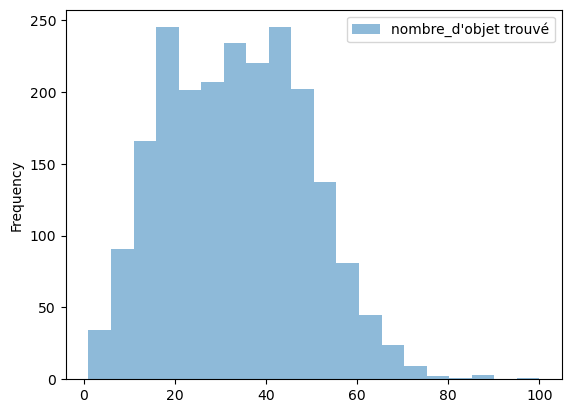

In [619]:
df_nombre_objet_trouve_evolution_1.plot.hist(bins=20, alpha=0.5)

In [620]:
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:grey', 'tab:purple']


<AxesSubplot: ylabel='Frequency'>

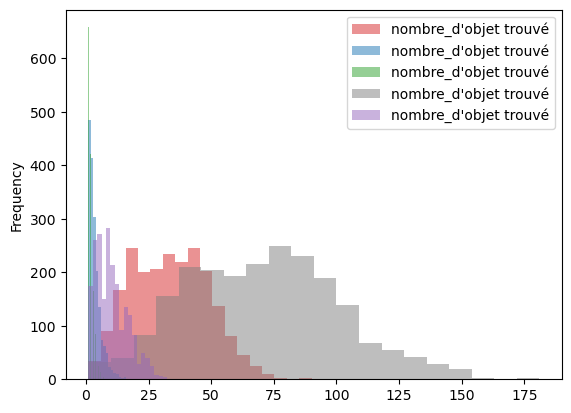

In [621]:
ax1 = df_nombre_objet_trouve_evolution_1.plot.hist(bins=20, alpha=0.5,color=bar_colors[0])
df_nombre_objet_trouve_evolution_2.plot.hist(bins=20, alpha=0.5, ax=ax1,color=bar_colors[1])
df_nombre_objet_trouve_evolution_3.plot.hist(bins=20, alpha=0.5, ax=ax1,color=bar_colors[2])
df_nombre_objet_trouve_evolution_4.plot.hist(bins=20, alpha=0.5, ax=ax1,color=bar_colors[3])
df_nombre_objet_trouve_evolution_5.plot.hist(bins=20, alpha=0.5, ax=ax1,color=bar_colors[4])



In [703]:

import plotly.express as px

# Define data
data_1 =df_nombre_objet_trouve_evolution_1
data_2 =df_nombre_objet_trouve_evolution_2
data_3 =df_nombre_objet_trouve_evolution_3
data_4 =df_nombre_objet_trouve_evolution_4
data_5 =df_nombre_objet_trouve_evolution_5
# Create histogram
fig_data = px.histogram(data_1, x='date', title='Histogram Example')

# Il y une erreur
# fig_data.add_trace(px.histogram(data_2, x='date'))
# fig_data.add_trace(px.histogram(data_3, x='date'))
# fig_data.add_trace(px.histogram(data_4, x='date'))
# fig_data.add_trace(px.histogram(data_5, x='date'))

# Show the graph
fig_data
fig_data.show()

In [622]:
# plt.plot(x1,y1,alpha=0.5,color=bar_colors[0],label='Histogramme 1')
# plt.plot(x2,y2,alpha=0.5,color=bar_colors[1],label='Histogramme 2')
# plt.plot(x3,y3,alpha=0.5,color=bar_colors[2],label='Histogramme 3')
# plt.plot(x4,y4,alpha=0.5,color=bar_colors[3],label='Histogramme 4')
# plt.plot(x5,y5,alpha=0.5,color=bar_colors[4],label='Histogramme 5')

# # Affichez le graphique
# plt.show()



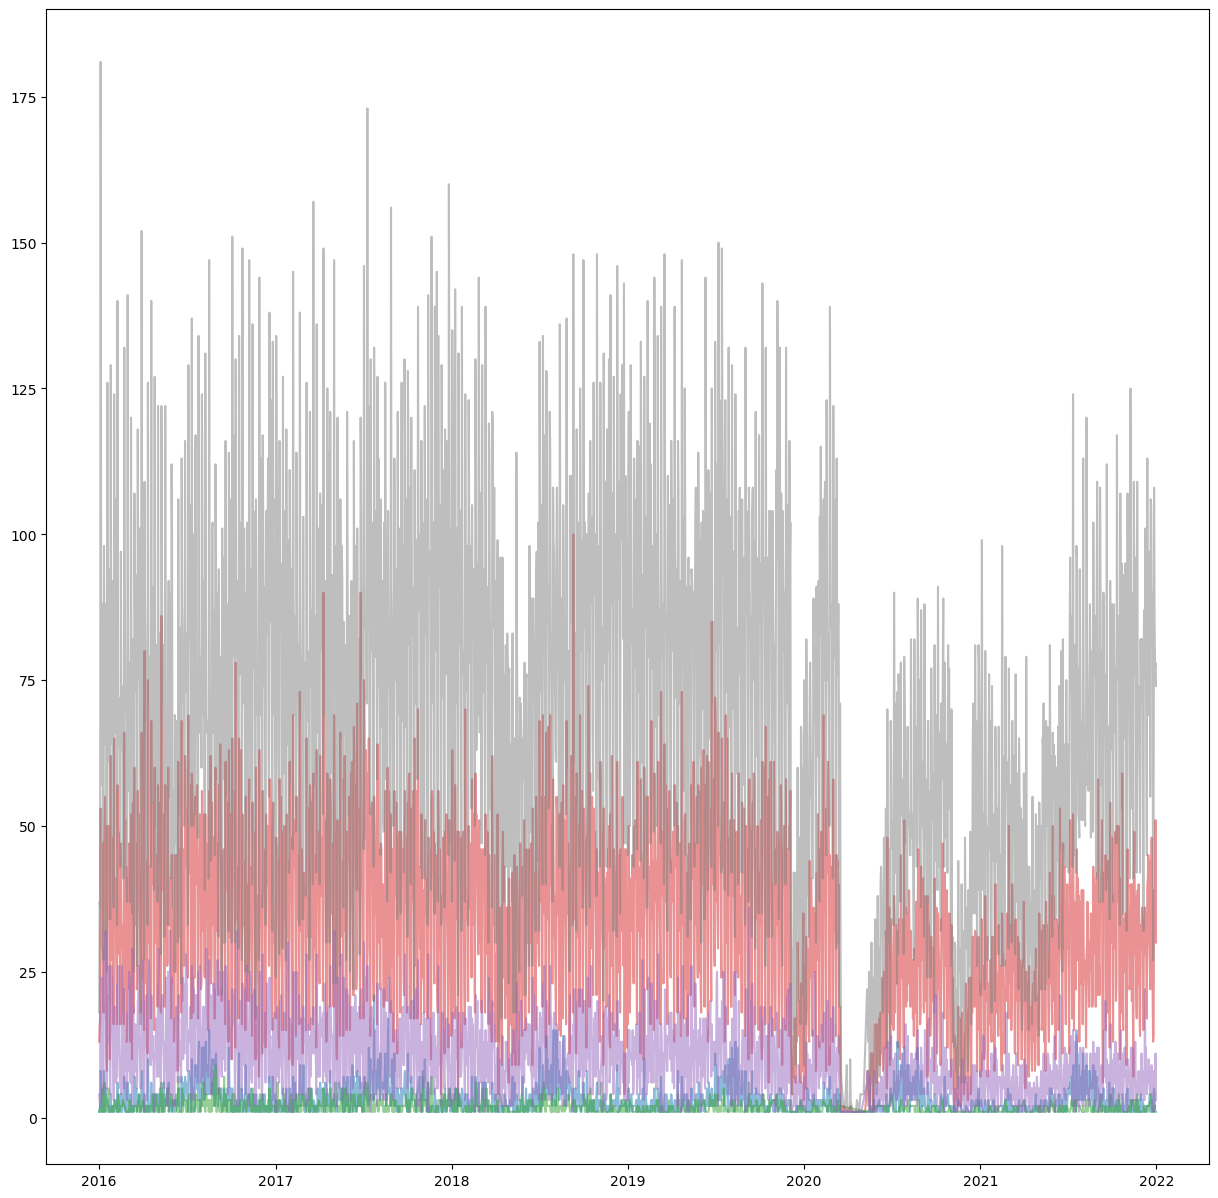

In [623]:

plt.figure(figsize=(15,15))
x1=df_nombre_objet_trouve_evolution_1["date"]
y1=df_nombre_objet_trouve_evolution_1["nombre_d\'objet trouvé"]

x2=df_nombre_objet_trouve_evolution_2["date"]
y2=df_nombre_objet_trouve_evolution_2["nombre_d\'objet trouvé"]

x3=df_nombre_objet_trouve_evolution_3["date"]
y3=df_nombre_objet_trouve_evolution_3["nombre_d\'objet trouvé"]

x4=df_nombre_objet_trouve_evolution_4["date"]
y4=df_nombre_objet_trouve_evolution_4["nombre_d\'objet trouvé"]

x5=df_nombre_objet_trouve_evolution_5["date"]
y5=df_nombre_objet_trouve_evolution_5["nombre_d\'objet trouvé"]


# set the color used for the 5 bars
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:grey', 'tab:purple']



plt.plot(x1,y1,alpha=0.5,color=bar_colors[0],label='Histogramme 1')
plt.plot(x2,y2,alpha=0.5,color=bar_colors[1],label='Histogramme 2')
plt.plot(x3,y3,alpha=0.5,color=bar_colors[2],label='Histogramme 3')
plt.plot(x4,y4,alpha=0.5,color=bar_colors[3],label='Histogramme 4')
plt.plot(x5,y5,alpha=0.5,color=bar_colors[4],label='Histogramme 5')

# Affichez le graphique
plt.show()


In [624]:

plt.figure(figsize=(15,15))
x1=df_nombre_objet_trouve_evolution_1["date"]
y1=df_nombre_objet_trouve_evolution_1["nombre_d\'objet trouvé"]

x2=df_nombre_objet_trouve_evolution_2["date"]
y2=df_nombre_objet_trouve_evolution_2["nombre_d\'objet trouvé"]

x3=df_nombre_objet_trouve_evolution_3["date"]
y3=df_nombre_objet_trouve_evolution_3["nombre_d\'objet trouvé"]

x4=df_nombre_objet_trouve_evolution_4["date"]
y4=df_nombre_objet_trouve_evolution_4["nombre_d\'objet trouvé"]

x5=df_nombre_objet_trouve_evolution_5["date"]
y5=df_nombre_objet_trouve_evolution_5["nombre_d\'objet trouvé"]

# set the color used for the 5 bars
bar_colors_plotly = ['red', 'blue', 'green', 'grey', 'purple']

fig1 = px.line(df_nombre_objet_trouve_evolution_1, x1, y1, title=list_objet_trouve[0])
fig2 = px.line(df_nombre_objet_trouve_evolution_2, x2 , y2, title=list_objet_trouve[1])
fig3 = px.line(df_nombre_objet_trouve_evolution_3, x3, y3, title=list_objet_trouve[2])
fig4 = px.line(df_nombre_objet_trouve_evolution_4, x4, y4, title=list_objet_trouve[3])
fig5 = px.line(df_nombre_objet_trouve_evolution_5, x5, y5, title=list_objet_trouve[4])



# Créez l'histogramme
fig1.update_traces(line=dict(color=bar_colors_plotly[0]))
fig1.show()

fig2.update_traces(line=dict(color=bar_colors_plotly[1]))
fig2.show()

fig3.update_traces(line=dict(color=bar_colors_plotly[2]))
fig3.show()

fig4.update_traces(line=dict(color=bar_colors_plotly[3]))
fig4.show()

fig5.update_traces(line=dict(color=bar_colors_plotly[4]))
fig5.show()
# # Spécifiez les dates à afficher en Datetime
# plt.xlim(df_nombre_objet_trouve_evolution_1["date"][0], df_nombre_objet_trouve_evolution_1["date"][2147])


<Figure size 1500x1500 with 0 Axes>

In [625]:
df_semaine_evolution_1=df_nombre_objet_trouve_evolution_1.groupby(pd.Grouper(key='date', freq='W-MON'))["nombre_d'objet trouvé"].agg('sum')
df_semaine_evolution_1=df_semaine_evolution_1.to_frame()


In [626]:
df_semaine_evolution_1.reset_index(inplace=True)

In [627]:
df_semaine_evolution_1

,date,nombre_d'objet trouvé
0,2016-01-04,99
1,2016-01-11,227
2,2016-01-18,257
3,2016-01-25,256
4,2016-02-01,261
...,...,...
309,2021-12-06,202
310,2021-12-13,215
311,2021-12-20,252
312,2021-12-27,203


In [628]:
df_semaine_evolution_2=df_nombre_objet_trouve_evolution_2.groupby(pd.Grouper(key='date', freq='W-MON'))["nombre_d'objet trouvé"].agg('sum')
df_semaine_evolution_2= df_semaine_evolution_2.to_frame()

In [629]:
df_semaine_evolution_2.reset_index(inplace=True)

In [630]:
df_semaine_evolution_3=df_nombre_objet_trouve_evolution_3.groupby(pd.Grouper(key='date', freq='W-MON'))["nombre_d'objet trouvé"].agg('sum')
df_semaine_evolution_3 = df_semaine_evolution_3.to_frame()

In [631]:
df_semaine_evolution_3.reset_index(inplace=True)

In [632]:
df_semaine_evolution_4=df_nombre_objet_trouve_evolution_4.groupby(pd.Grouper(key='date', freq='W-MON'))["nombre_d'objet trouvé"].agg('sum')
df_semaine_evolution_4 = df_semaine_evolution_4.to_frame()

In [633]:
df_semaine_evolution_4.reset_index(inplace=True)

In [634]:
df_semaine_evolution_5=df_nombre_objet_trouve_evolution_5.groupby(pd.Grouper(key='date', freq='W-MON'))["nombre_d'objet trouvé"].agg('sum')
df_semaine_evolution_5 = df_semaine_evolution_5.to_frame()

In [635]:
df_semaine_evolution_5.reset_index(inplace=True)

In [636]:
plt.figure(figsize=(15,15))
x1_1=df_semaine_evolution_1["date"]
y1_1=df_semaine_evolution_1["nombre_d\'objet trouvé"]

x2_1=df_semaine_evolution_2["date"]
y2_1=df_semaine_evolution_2["nombre_d\'objet trouvé"]

x3_1=df_semaine_evolution_3["date"]
y3_1=df_semaine_evolution_3["nombre_d\'objet trouvé"]

x4_1=df_semaine_evolution_4["date"]
y4_1=df_semaine_evolution_4["nombre_d\'objet trouvé"]

x5_1=df_semaine_evolution_5["date"]
y5_1=df_semaine_evolution_5["nombre_d\'objet trouvé"]

# set the color used for the 5 bars
bar_colors_plotly = ['red', 'blue', 'green', 'grey', 'purple']

fig1 = px.line(df_semaine_evolution_1, x1_1, y1_1, title=list_objet_trouve[0])
fig2 = px.line(df_semaine_evolution_2, x2_1 , y2_1, title=list_objet_trouve[1])
fig3 = px.line(df_semaine_evolution_3, x3_1, y3_1, title=list_objet_trouve[2])
fig4 = px.line(df_semaine_evolution_4, x4_1, y4_1, title=list_objet_trouve[3])
fig5 = px.line(df_semaine_evolution_5, x5_1, y5_1, title=list_objet_trouve[4])



# Créez l'histogramme
fig1.update_traces(line=dict(color=bar_colors_plotly[0]))
fig1.show()

fig2.update_traces(line=dict(color=bar_colors_plotly[1]))
fig2.show()

fig3.update_traces(line=dict(color=bar_colors_plotly[2]))
fig3.show()

fig4.update_traces(line=dict(color=bar_colors_plotly[3]))
fig4.show()

fig5.update_traces(line=dict(color=bar_colors_plotly[4]))
fig5.show()

<Figure size 1500x1500 with 0 Axes>

<bound method _AxesBase.set_ylabel of <AxesSubplot: title={'center': 'Evolution des objets trouvés par semaine'}, xlabel='Date'>>

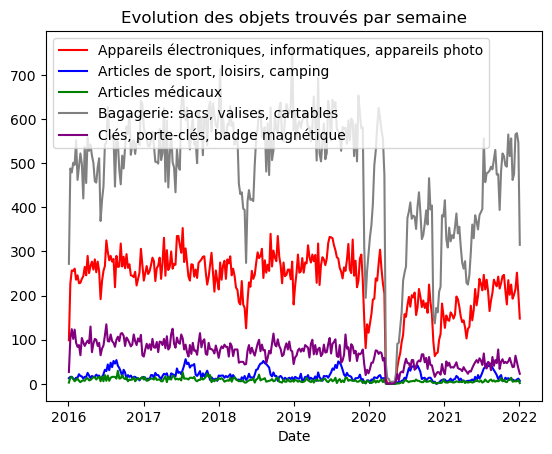

In [637]:
fig, ax = plt.subplots()

x1_1=df_semaine_evolution_1["date"]
y1_1=df_semaine_evolution_1["nombre_d\'objet trouvé"]

x2_1=df_semaine_evolution_2["date"]
y2_1=df_semaine_evolution_2["nombre_d\'objet trouvé"]

x3_1=df_semaine_evolution_3["date"]
y3_1=df_semaine_evolution_3["nombre_d\'objet trouvé"]

x4_1=df_semaine_evolution_4["date"]
y4_1=df_semaine_evolution_4["nombre_d\'objet trouvé"]

x5_1=df_semaine_evolution_5["date"]
y5_1=df_semaine_evolution_5["nombre_d\'objet trouvé"]

# set the color used for the 5 bars
bar_colors_plotly = ['red', 'blue', 'green', 'grey', 'purple']

ax.plot(x1_1,y1_1, color=bar_colors_plotly[0], label=list_objet_trouve[0])
ax.plot(x2_1,y2_1, color=bar_colors_plotly[1], label=list_objet_trouve[1])
ax.plot(x3_1,y3_1, color=bar_colors_plotly[2], label=list_objet_trouve[2])
ax.plot(x4_1,y4_1, color=bar_colors_plotly[3], label=list_objet_trouve[3])
ax.plot(x5_1,y5_1, color=bar_colors_plotly[4], label=list_objet_trouve[4])
ax.legend()
ax.set_title('Evolution des objets trouvés par semaine')
ax.set_xlabel('Date')
ax.set_ylabel


Question n°3

In [638]:

import folium

# Création d'une carte centrée sur la France
m = folium.Map(location=[47.07, 2.39], zoom_start=6)

# Ajout des marqueurs sur la carte
folium.Marker([48.86, 2.35], popup='Paris').add_to(m)
folium.Marker([43.3, 5.4], popup='Marseille').add_to(m)
folium.Marker([44.83, -0.58], popup='Bordeaux').add_to(m)
folium.Marker([43.6, 1.4], popup='Toulouse').add_to(m)

# Affichage de la carte
m.fit_bounds([[41.3625, -5.9643], [51.09, 9.56]])
folium.Marker(location=[48.8566, 2.3522], popup='Paris').add_to(m)

m

In [639]:
df_frequentation =pd.read_csv("frequentation_mensuel.csv")

In [640]:
df_frequentation

,id_gare,code_postal,nom_gare,region,2016_01,2016_02,2016_03,2016_04,2016_05,2016_06,...,2021_03,2021_04,2021_05,2021_06,2021_07,2021_08,2021_09,2021_10,2021_11,2021_12
0,87313759,60220,Abancourt,60,6849,6849,6849,6849,6849,6849,...,5306,5750,5939,6162,6971,7052,6574,6754,6452,7175
1,87381657,78260,Achères Ville,78,575761,575761,575761,575761,575761,575761,...,250955,271967,280899,291432,329704,333566,310934,319454,305187,339368
2,87781278,34300,Agde,34,123873,123873,123873,123873,123873,123873,...,64650,70063,72364,75078,84937,85932,80102,82297,78621,87427
3,87741421,73610,Aiguebelette-le-Lac,73,652,652,652,652,652,652,...,375,406,419,435,492,498,464,477,456,507
4,87586693,47190,Aiguillon,47,15031,15031,15031,15031,15031,15031,...,10933,11849,12238,12697,14364,14533,13547,13918,13296,14785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,87473116,22120,Yffiniac,22,6531,6531,6531,6531,6531,6531,...,2255,2444,2525,2619,2963,2998,2794,2871,2743,3050
2966,87671487,40100,Ygos-Saint-Saturnin,40,4549,4549,4549,4549,4549,4549,...,3364,3646,3766,3907,4420,4472,4168,4283,4091,4550
2967,87645101,15130,Ytrac,15,6,6,6,6,6,6,...,4,4,4,4,5,5,5,5,5,5
2968,87191304,57110,Yutz,57,322,322,322,322,322,322,...,89,97,100,104,117,119,111,114,109,121


Partie data analyse en vue de la DATA SCIENCE. - (sur un notebook)++

Question n°1

In [641]:
df_analysis = pd.read_csv('merge_final.csv')

In [642]:
df_analysis


,Unnamed: 0,temperature_moyenne,nb_lost_item
0,0,-9.3500,8
1,1,-8.0750,1
2,2,-8.0000,4
3,3,-7.9625,6
4,4,-7.8000,8
...,...,...,...
7721,7721,32.2750,5
7722,7722,32.3500,6
7723,7723,32.6125,4
7724,7724,33.1500,1


In [643]:
df_presentation = df_analysis

# Créer le scatterplot
fig = px.scatter(df_presentation, x='temperature_moyenne', y='nb_lost_item')

# Afficher le scatterplot
fig.show()

In [644]:

fig = px.scatter_matrix(df_presentation, dimensions = ["temperature_moyenne","nb_lost_item"])
fig

/home/simplon/miniconda3/envs/API_environnement/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [645]:
df_presentation=df_presentation.drop("Unnamed: 0", axis=1)
df_presentation

,temperature_moyenne,nb_lost_item
0,-9.3500,8
1,-8.0750,1
2,-8.0000,4
3,-7.9625,6
4,-7.8000,8
...,...,...
7721,32.2750,5
7722,32.3500,6
7723,32.6125,4
7724,33.1500,1


In [646]:
df_presentation.corr()

,temperature_moyenne,nb_lost_item
temperature_moyenne,1.000000,0.077594
nb_lost_item,0.077594,1.000000


<AxesSubplot: >

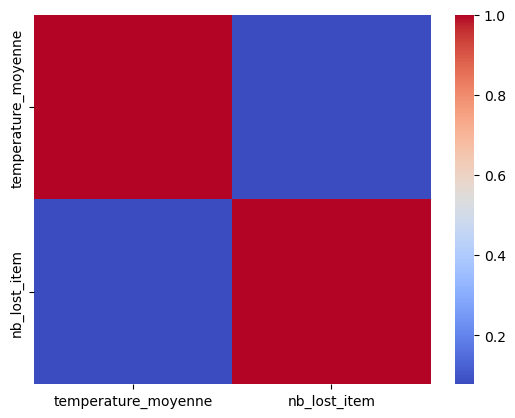

In [647]:
sns.heatmap(df_presentation.corr(), cmap='coolwarm')

Question n°2

In [648]:
df_nombre_objet_trouve

,record_id,id_gare_origine,nom_gare_origine,type_objet_trouve,nature_objet_trouve,date
0,1,0087271007,Paris Gare du Nord,Pièces d'identités et papiers personnels,"Carte d'identité, passeport, permis de conduire",2016-01-31
1,2,0087271007,Paris Gare du Nord,"Appareils électroniques, informatiques, appare...",Téléphone portable,2016-01-31
2,3,0087773002,Montpellier Saint-Roch,"Bagagerie: sacs, valises, cartables","Sac d'enseigne (plastique, papier, …)",2016-01-31
3,4,0087773002,Montpellier Saint-Roch,Divers,Autres divers,2016-01-31
4,5,0087271007,Paris Gare du Nord,"Bagagerie: sacs, valises, cartables","Sacoche ventrale, banane",2016-01-31
...,...,...,...,...,...,...
481297,481298,0087683268,Laroche - Migennes,Articles médicaux,Radiographie,2021-12-01
481298,481299,0087212027,Strasbourg,"Bagagerie: sacs, valises, cartables","Sac de voyage, sac de sport, sac à bandoulière",2021-12-01
481299,481300,0087411017,Rouen Rive Droite,"Clés, porte-clés, badge magnétique","Clés, porte-clés",2021-12-01
481300,481301,0087723197,Lyon Part Dieu,"Appareils électroniques, informatiques, appare...","AirPod, casque audio, écouteurs",2021-12-01


In [649]:
df_nombre_objet_trouve_saison_preparation=df_nombre_objet_trouve.groupby(by="date").apply(lambda s: pd.Series({ 
    "nombre_d'objet trouvé": s["date"].count(), 

}))


In [650]:
df_nombre_objet_trouve_saison_preparation

,nombre_d'objet trouvé
date,
2016-01-01,83
2016-01-02,114
2016-01-03,134
2016-01-04,423
2016-01-05,250
...,...
2021-12-27,251
2021-12-28,211
2021-12-29,179


In [651]:
# df_nombre_objet_trouve_saison_preparation =df_nombre_objet_trouve_saison_preparation.reset_index(inplace=True)

In [652]:

df_saison = df_nombre_objet_trouve_saison_preparation.resample("90D").median()

In [653]:
df_saison

,nombre_d'objet trouvé
date,
2016-01-01,252.0
2016-03-31,256.5
2016-06-29,303.5
2016-09-27,278.5
2016-12-26,261.5
2017-03-26,285.5
2017-06-24,286.5
2017-09-22,280.5
2017-12-21,263.5


In [654]:

df_saison.reset_index(inplace=True)

In [655]:
df_saison

,date,nombre_d'objet trouvé
0,2016-01-01,252.0
1,2016-03-31,256.5
2,2016-06-29,303.5
3,2016-09-27,278.5
4,2016-12-26,261.5
5,2017-03-26,285.5
6,2017-06-24,286.5
7,2017-09-22,280.5
8,2017-12-21,263.5
9,2018-03-21,205.5


question n°3


In [656]:
df_nombre_objet_trouve_saison_preparation

,nombre_d'objet trouvé
date,
2016-01-01,83
2016-01-02,114
2016-01-03,134
2016-01-04,423
2016-01-05,250
...,...
2021-12-27,251
2021-12-28,211
2021-12-29,179


In [657]:
df_saison_boxplot = df_nombre_objet_trouve_saison_preparation.resample("90D").mean()

In [658]:
df_saison_boxplot

,nombre_d'objet trouvé
date,
2016-01-01,240.500000
2016-03-31,253.744444
2016-06-29,287.755556
2016-09-27,261.877778
2016-12-26,252.844444
2017-03-26,271.122222
2017-06-24,285.900000
2017-09-22,266.055556
2017-12-21,251.700000


In [659]:
df_saison_boxplot.shape

(25, 1)

In [660]:
liste_saison = ["Printemps","Eté","Automne","Hiver"]
liste_saison_objet_trouve =[ liste_saison[i%4] for i in range(0,25)]
liste_saison_objet_trouve

['Printemps',
 'Eté',
 'Automne',
 'Hiver',
 'Printemps',
 'Eté',
 'Automne',
 'Hiver',
 'Printemps',
 'Eté',
 'Automne',
 'Hiver',
 'Printemps',
 'Eté',
 'Automne',
 'Hiver',
 'Printemps',
 'Eté',
 'Automne',
 'Hiver',
 'Printemps',
 'Eté',
 'Automne',
 'Hiver',
 'Printemps']

In [661]:
df_saison_boxplot.loc[:, 'Saison'] = liste_saison_objet_trouve

In [662]:
df_saison_boxplot

,nombre_d'objet trouvé,Saison
date,,
2016-01-01,240.500000,Printemps
2016-03-31,253.744444,Eté
2016-06-29,287.755556,Automne
2016-09-27,261.877778,Hiver
2016-12-26,252.844444,Printemps
2017-03-26,271.122222,Eté
2017-06-24,285.900000,Automne
2017-09-22,266.055556,Hiver
2017-12-21,251.700000,Printemps


In [663]:
df_saison_boxplot.reset_index(inplace=True)

In [664]:
df_saison_boxplot

,date,nombre_d'objet trouvé,Saison
0,2016-01-01,240.500000,Printemps
1,2016-03-31,253.744444,Eté
2,2016-06-29,287.755556,Automne
3,2016-09-27,261.877778,Hiver
4,2016-12-26,252.844444,Printemps
5,2017-03-26,271.122222,Eté
6,2017-06-24,285.900000,Automne
7,2017-09-22,266.055556,Hiver
8,2017-12-21,251.700000,Printemps
9,2018-03-21,200.411111,Eté


In [665]:
df_saison_boxplot_final= df_saison_boxplot.drop("date",axis=1)

In [666]:
df_saison_boxplot_final

,nombre_d'objet trouvé,Saison
0,240.500000,Printemps
1,253.744444,Eté
2,287.755556,Automne
3,261.877778,Hiver
4,252.844444,Printemps
5,271.122222,Eté
6,285.900000,Automne
7,266.055556,Hiver
8,251.700000,Printemps
9,200.411111,Eté


In [667]:
df_saison_boxplot_final.reset_index(inplace=True)

In [668]:
fig = px.box(df_saison_boxplot_final, x="Saison", y="nombre_d'objet trouvé", title="Boxplot de mon dataframe",
              )

fig.show()

In [669]:
df_nombre_objet_trouve_saison_preparation

,nombre_d'objet trouvé
date,
2016-01-01,83
2016-01-02,114
2016-01-03,134
2016-01-04,423
2016-01-05,250
...,...
2021-12-27,251
2021-12-28,211
2021-12-29,179


In [670]:
df_saison_boxplot_total = df_nombre_objet_trouve_saison_preparation

In [671]:
df_nombre_objet_trouve_saison_preparation.shape

(2173, 1)

In [672]:
df_saison_prerparation = df_nombre_objet_trouve_saison_preparation

In [673]:
df_saison_prerparation.reset_index(inplace=True)

In [674]:
liste_saison_total = list(df_saison_prerparation['date'].to_numpy())

In [675]:
liste_saison_total

[numpy.datetime64('2016-01-01T00:00:00.000000000'),
 numpy.datetime64('2016-01-02T00:00:00.000000000'),
 numpy.datetime64('2016-01-03T00:00:00.000000000'),
 numpy.datetime64('2016-01-04T00:00:00.000000000'),
 numpy.datetime64('2016-01-05T00:00:00.000000000'),
 numpy.datetime64('2016-01-06T00:00:00.000000000'),
 numpy.datetime64('2016-01-07T00:00:00.000000000'),
 numpy.datetime64('2016-01-08T00:00:00.000000000'),
 numpy.datetime64('2016-01-09T00:00:00.000000000'),
 numpy.datetime64('2016-01-10T00:00:00.000000000'),
 numpy.datetime64('2016-01-11T00:00:00.000000000'),
 numpy.datetime64('2016-01-12T00:00:00.000000000'),
 numpy.datetime64('2016-01-13T00:00:00.000000000'),
 numpy.datetime64('2016-01-14T00:00:00.000000000'),
 numpy.datetime64('2016-01-15T00:00:00.000000000'),
 numpy.datetime64('2016-01-16T00:00:00.000000000'),
 numpy.datetime64('2016-01-17T00:00:00.000000000'),
 numpy.datetime64('2016-01-18T00:00:00.000000000'),
 numpy.datetime64('2016-01-19T00:00:00.000000000'),
 numpy.datet

In [676]:
from dateutil import parser
datetime_obj = parser.parse('2018-02-06T13:12:18.1278015Z')

In [677]:

datetime_liste_saison_total = [parser.parse(str(dt)) for dt in liste_saison_total]

In [678]:
datetime_liste_saison_total

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0),
 datetime.datetime(2016, 1, 6, 0, 0),
 datetime.datetime(2016, 1, 7, 0, 0),
 datetime.datetime(2016, 1, 8, 0, 0),
 datetime.datetime(2016, 1, 9, 0, 0),
 datetime.datetime(2016, 1, 10, 0, 0),
 datetime.datetime(2016, 1, 11, 0, 0),
 datetime.datetime(2016, 1, 12, 0, 0),
 datetime.datetime(2016, 1, 13, 0, 0),
 datetime.datetime(2016, 1, 14, 0, 0),
 datetime.datetime(2016, 1, 15, 0, 0),
 datetime.datetime(2016, 1, 16, 0, 0),
 datetime.datetime(2016, 1, 17, 0, 0),
 datetime.datetime(2016, 1, 18, 0, 0),
 datetime.datetime(2016, 1, 19, 0, 0),
 datetime.datetime(2016, 1, 20, 0, 0),
 datetime.datetime(2016, 1, 21, 0, 0),
 datetime.datetime(2016, 1, 22, 0, 0),
 datetime.datetime(2016, 1, 23, 0, 0),
 datetime.datetime(2016, 1, 24, 0, 0),
 datetime.datetime(2016, 1, 25, 0, 0),
 datetime.datetime(2016, 1, 26, 0,

In [679]:
def get_season(day): 
  iso_year, iso_week, iso_day = day.isocalendar()

  if iso_week >= 1 and iso_week <= 13: 
    return 'Printemps'
  elif iso_week >= 14 and iso_week <= 26: 
    return 'Eté'
  elif iso_week >= 27 and iso_week <= 39: 
    return 'Automne'
  elif iso_week >= 40 and iso_week <= 53: 
    return 'Hiver'

In [680]:
liste_saison_total_modifie = [get_season(x) for x in datetime_liste_saison_total]

In [681]:
liste_saison_total_modifie

['Hiver',
 'Hiver',
 'Hiver',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Printemps',
 'Pr

In [682]:
df_saison_boxplot_total.loc[:, 'Saison'] = liste_saison_total_modifie

In [683]:
df_saison_boxplot_total

,date,nombre_d'objet trouvé,Saison
0,2016-01-01,83,Hiver
1,2016-01-02,114,Hiver
2,2016-01-03,134,Hiver
3,2016-01-04,423,Printemps
4,2016-01-05,250,Printemps
...,...,...,...
2168,2021-12-27,251,Hiver
2169,2021-12-28,211,Hiver
2170,2021-12-29,179,Hiver
2171,2021-12-30,218,Hiver


In [684]:
df_saison_boxplot_total.drop("date",axis=1)

,nombre_d'objet trouvé,Saison
0,83,Hiver
1,114,Hiver
2,134,Hiver
3,423,Printemps
4,250,Printemps
...,...,...
2168,251,Hiver
2169,211,Hiver
2170,179,Hiver
2171,218,Hiver


In [685]:
fig6 = px.box(df_saison_boxplot_total, x="Saison", y="nombre_d'objet trouvé", title="Boxplot de mon dataframe",
              )

fig6.show()

In [686]:
f_oneway_result =  stats.f_oneway(df_saison_boxplot_total["nombre_d'objet trouvé"], df_saison_boxplot_total['Saison']=="Hiver",df_saison_boxplot_total['Saison']=="Printemps",df_saison_boxplot_total['Saison']=="Eté",df_saison_boxplot_total['Saison']=="Automne")


In [687]:
f_oneway_result

F_onewayResult(statistic=10768.006484367723, pvalue=0.0)

Question n°4

In [706]:
df_mois_contigency= df_nombre_objet_trouve.groupby(by="type_objet_trouve").apply(lambda s: pd.Series({ 
    "nombre_d'objet trouvé": s["date"].count(), 

}))


In [707]:
df_mois_contigency

,nombre_d'objet trouvé
type_objet_trouve,
"Appareils électroniques, informatiques, appareils photo",71886
"Articles d'enfants, de puériculture",5214
"Articles de sport, loisirs, camping",5799
Articles médicaux,2591
"Bagagerie: sacs, valises, cartables",151207
"Bijoux, montres",4509
"Clés, porte-clés, badge magnétique",21551
Divers,9676
Instruments de musique,1292


In [705]:
df_mois_contigency["date"]=df_nombre_objet_trouve["date"].

TypeError: dtype '<class 'datetime.datetime'>' not understood

In [690]:
df_mois_seulement= df_nombre_objet_trouve.groupby(by=["type_objet_trouve",pd.Grouper(key='date', freq='M')]).apply(lambda s: pd.Series({ 
    "nombre_d'objet trouvé": s["date"].count(), 

}))


In [691]:
# df_mois_seulement.reset_index(inplace=True)

In [692]:
df_mois_seulement

nombre_d'objet trouvé
type_objet_trouve                                  date                             
Appareils électroniques, informatiques, apparei... 2016-01-31                   1035
                                                   2016-02-29                   1004
                                                   2016-03-31                   1126
                                                   2016-04-30                   1135
                                                   2016-05-31                   1188
...                                                                              ...
Vêtements, chaussures                              2021-08-31                    897
                                                   2021-09-30                    873
                                                   2021-10-31                    773
                                                   2021-11-30                    502
                                                   2021-12-31                    460

[1145 rows x 1 columns]

In [693]:
df_mois_contigency

,nombre_d'objet trouvé,date
type_objet_trouve,,
"Appareils électroniques, informatiques, appareils photo",71886,"TimeGrouper(key='date', freq=<MonthEnd>, axis=..."
"Articles d'enfants, de puériculture",5214,"TimeGrouper(key='date', freq=<MonthEnd>, axis=..."
"Articles de sport, loisirs, camping",5799,"TimeGrouper(key='date', freq=<MonthEnd>, axis=..."
Articles médicaux,2591,"TimeGrouper(key='date', freq=<MonthEnd>, axis=..."
"Bagagerie: sacs, valises, cartables",151207,"TimeGrouper(key='date', freq=<MonthEnd>, axis=..."
"Bijoux, montres",4509,"TimeGrouper(key='date', freq=<MonthEnd>, axis=..."
"Clés, porte-clés, badge magnétique",21551,"TimeGrouper(key='date', freq=<MonthEnd>, axis=..."
Divers,9676,"TimeGrouper(key='date', freq=<MonthEnd>, axis=..."
Instruments de musique,1292,"TimeGrouper(key='date', freq=<MonthEnd>, axis=..."


In [694]:
# df_mois_preparation.reset_index(inplace=True)

In [696]:
chi2, p, dof, expected = chi2_contingency(df_mois_seulement)

In [697]:
chi2

0.0

In [709]:
chi_2, p_2, dof_2, expected_2 = chi2_contingency(df_mois_contigency)

In [710]:
chi_2

0.0